In [2]:
import h5py
import matplotlib.pyplot as plt

filename = "/media/brontodegus/Datos/MR-0571_nd4/analog/MR-0571_nd4_analog.h5"
with h5py.File(filename, 'r') as f:
    print(f["Data"]["Recording_0"]["AnalogStream"]["Stream_0"]["ChannelData"][2])
    chirp = f["Data"]["Recording_0"]["AnalogStream"]["Stream_0"]["ChannelData"][2]

[-3 -4 -4 ... 40 44 46]


In [4]:
import pandas as pd
sync_file = "/media/brontodegus/Datos/MR-0571_nd4/sync/event_list_MR-0571_nd4_.csv"
events = pd.read_csv(sync_file)
events_nuevo = events[events["protocol_name"] == "chirp_led"]
len_trials = len(events_nuevo)
print(len_trials)
events = events_nuevo
start_event = events["start_event"]
for i in start_event:
    start_event = i

1


In [5]:
start_event = int(start_event)
start_event

103174074

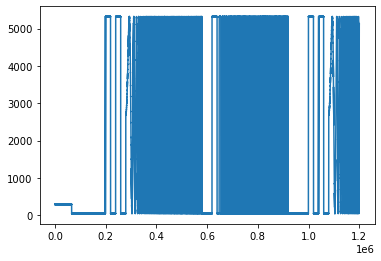

In [7]:
fs = 20000
plt.plot(chirp[start_event: start_event + 60*fs])

In [8]:
fs = 20000
for n, c in enumerate(chirp[start_event:]):
    if(c > 1000):
        start = n
        break
    else:
        continue

In [9]:
start = start + start_event - 2*fs

In [10]:
start

103333305

In [11]:
repetitions = 10
duration = 40
intensities = 3
fs= 20000
csv_array = []
chirp_data = []
for i in range(intensities):
    intensity_array = []
    for j in range(repetitions):
        intensity_array.append(chirp[start + j*duration*fs + i*duration*repetitions*fs: start+ (j+1)*duration*fs+ i*duration*repetitions*fs])       
        start_event = start+ (j)*duration*fs + i*duration*repetitions*fs
        end_event = start+ (j+1)*duration*fs + i*duration*repetitions*fs
        start_next_event = start+ (j+1)*duration*fs + i*duration*repetitions*fs
        event_duration = start+ (j+1)*duration*fs + i*duration*repetitions*fs - (start+ (j)*duration*fs+ i*duration*repetitions*fs)
        start_event_sec = start/fs + j*duration + i*duration*repetitions
        end_event_sec = start/fs + (j+1)*duration + i*duration*repetitions
        start_next_event_sec = start/fs+ (j+1)*duration + i*duration*repetitions
        event_duration_sec = start/fs+ (j+1)*duration + i*duration*repetitions - (start/fs+ (j)*duration+ i*duration*repetitions)
        protocol_name = "chirp"
        extra_description = "intensity_{}".format(i)
        repetition_name = "rep_{}".format(str(j).zfill(3))
        csv_array.append([start_event, end_event, start_next_event, event_duration, start_event_sec, end_event_sec, start_next_event_sec, event_duration_sec, protocol_name, extra_description, repetition_name])
    chirp_data.append(intensity_array)

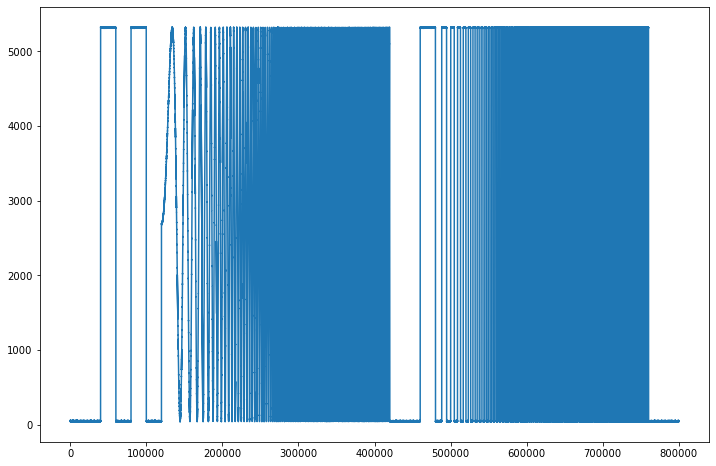

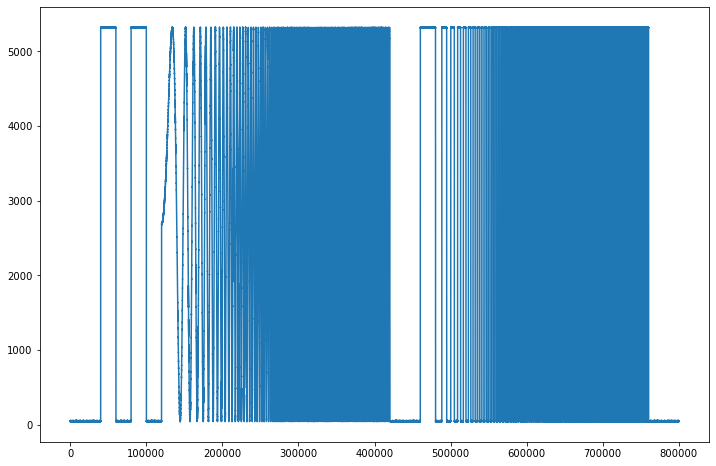

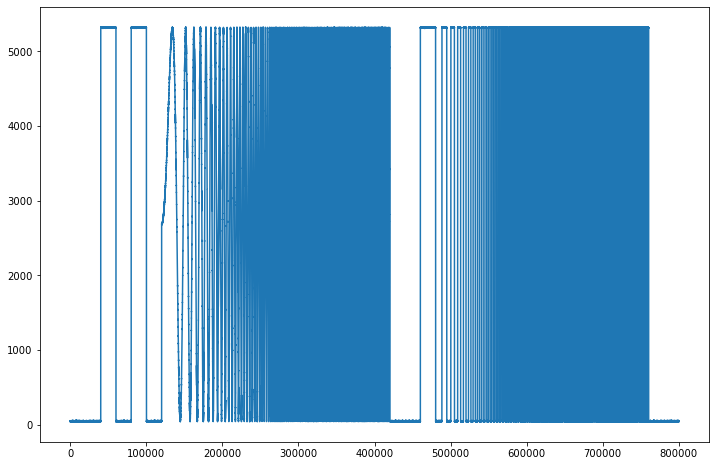

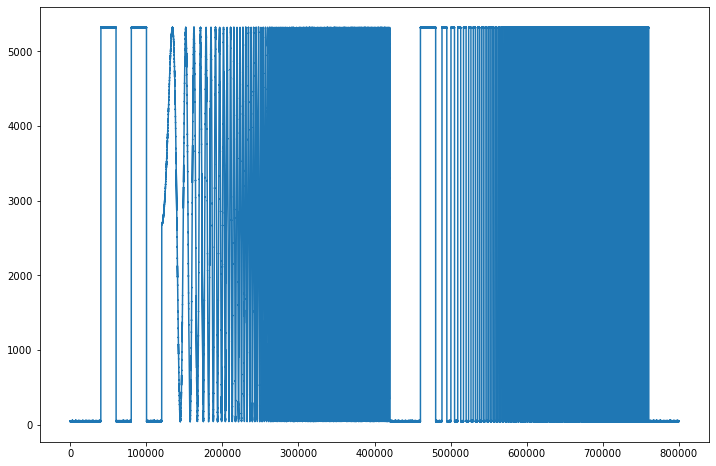

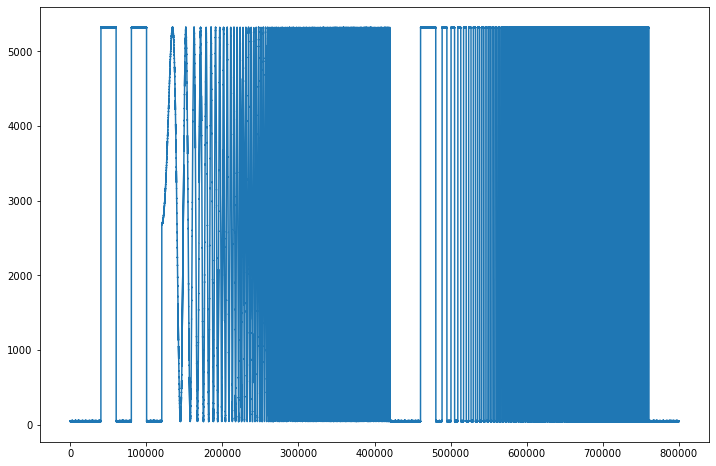

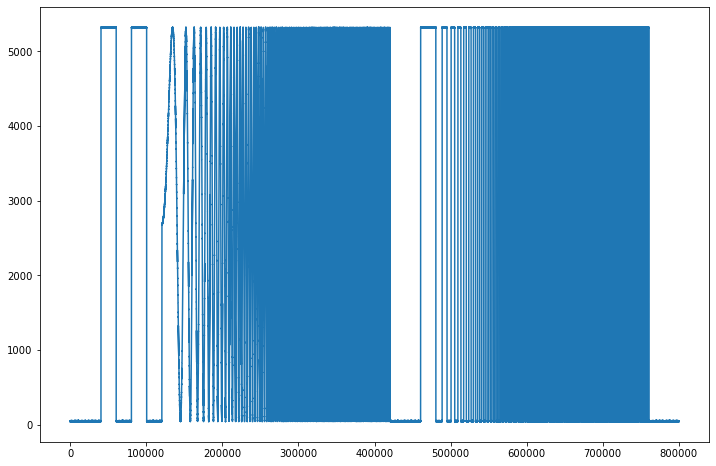

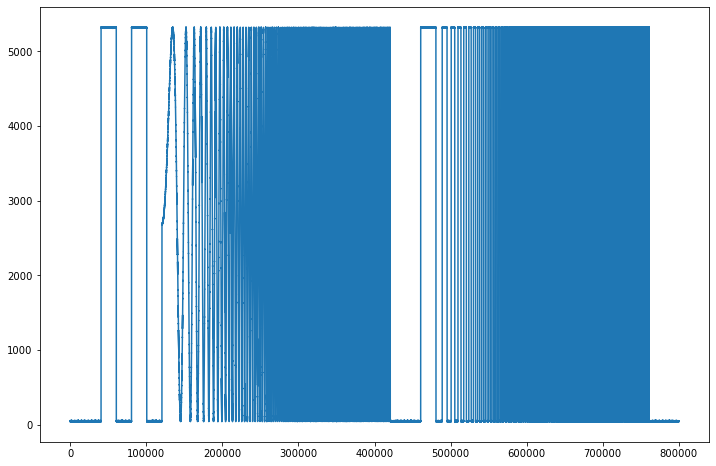

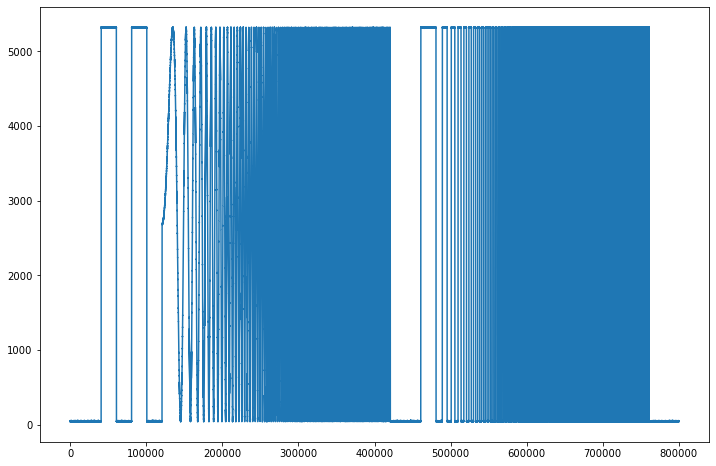

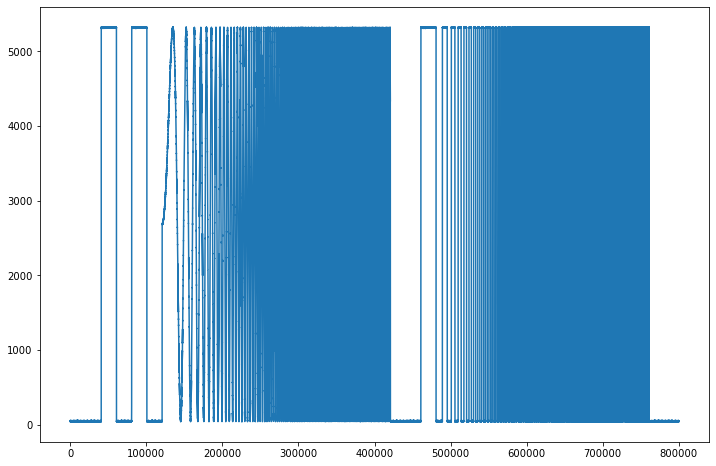

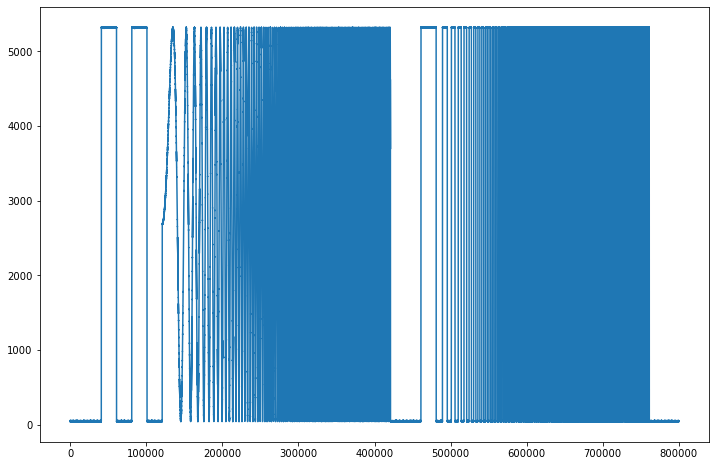

In [12]:
import numpy as np
for i in chirp_data:
    #plt.figure(figsize=(12,8))
    for j in i:
        plt.figure(figsize=(12,8))
        plt.plot(j)
    break

In [13]:
import numpy as np
import pandas as pd
csv = np.asarray(csv_array)
columns = ["start_event", "end_event", "start_next_event", "event_duration", "start_event_sec", "end_start_sec", "start_next_event_sec", "event_duration_sec", "protocol_name", "extra_description", "repetition_name"]
df = pd.DataFrame(csv, columns = columns)
df.to_csv("event_list_LED_.csv", index=False)